<a href="https://colab.research.google.com/github/Aaron3013352/customer-churn-prediction/blob/main/notebooks/02_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

This notebook explores the processed churn feature dataset produced via SQL.
The goal is to understand target distribution, key drivers of churn, and data
quality issues that inform downstream modeling decisions.


In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pd.set_option("display.max_columns", None)


In [9]:
df = pd.read_parquet("/content/churn_features.parquet")
df.head()



,churn_label,Count,Tenure Months,Monthly Charges,Total Charges,CLTV,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method
0,Yes,1,2,53.85,108.15,3239,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
1,Yes,1,2,70.70,151.65,2701,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,Yes,1,8,99.65,820.5,5372,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
3,Yes,1,28,104.80,3046.05,5003,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
4,Yes,1,49,103.70,5036.3,5340,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)


In [10]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   churn_label        7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Tenure Months      7043 non-null   int64  
 3   Monthly Charges    7043 non-null   float64
 4   Total Charges      7043 non-null   object 
 5   CLTV               7043 non-null   int64  
 6   Gender             7043 non-null   object 
 7   Senior Citizen     7043 non-null   object 
 8   Partner            7043 non-null   object 
 9   Dependents         7043 non-null   object 
 10  Phone Service      7043 non-null   object 
 11  Multiple Lines     7043 non-null   object 
 12  Internet Service   7043 non-null   object 
 13  Online Security    7043 non-null   object 
 14  Online Backup      7043 non-null   object 
 15  Device Protection  7043 non-null   object 
 16  Tech Support       7043 

## Dataset Overview
The processed dataset contains 7,043 customer records and 22 features,
including a mix of numeric and categorical variables. The target variable
is `churn_label`.


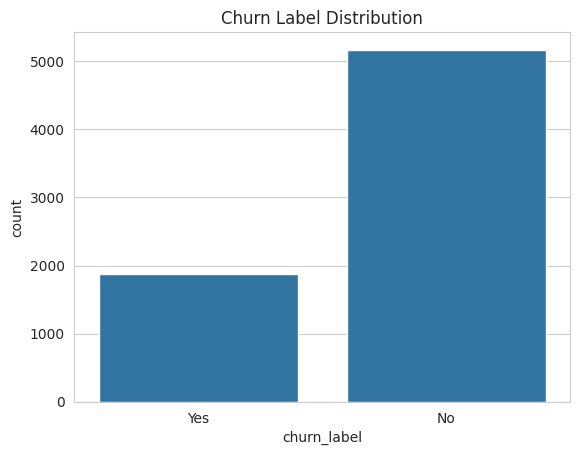

In [11]:
df["churn_label"].value_counts()
df["churn_label"].value_counts(normalize=True)
sns.countplot(data=df, x="churn_label")
plt.title("Churn Label Distribution")
plt.show()

## Target Distribution
Customer churn is moderately imbalanced, with fewer churned customers than
retained customers. This motivates the use of evaluation metrics such as
PR-AUC and recall rather than accuracy alone.


In [12]:
numeric_cols = [
    "Tenure Months",
    "Monthly Charges",
    "Total Charges",
    "CLTV"
]

df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Tenure Months,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
Monthly Charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
CLTV,7043.0,4400.295755,1183.057152,2003.00,3469.0,4527.00,5380.50,6500.00


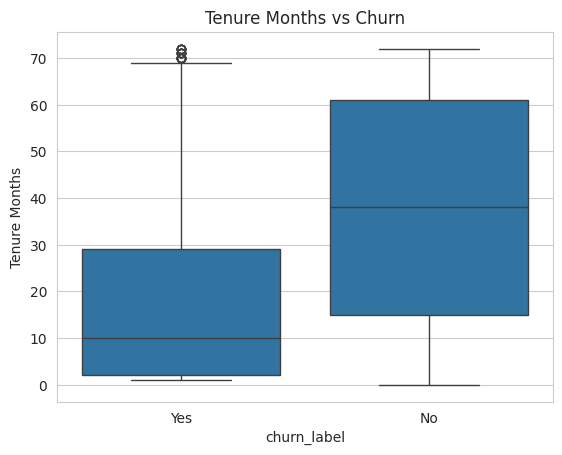

In [13]:
sns.boxplot(data=df, x="churn_label", y="Tenure Months")
plt.title("Tenure Months vs Churn")
plt.show()


## Tenure and Churn
Customers who churn tend to have significantly lower tenure, suggesting that
early lifecycle customers are at higher risk.


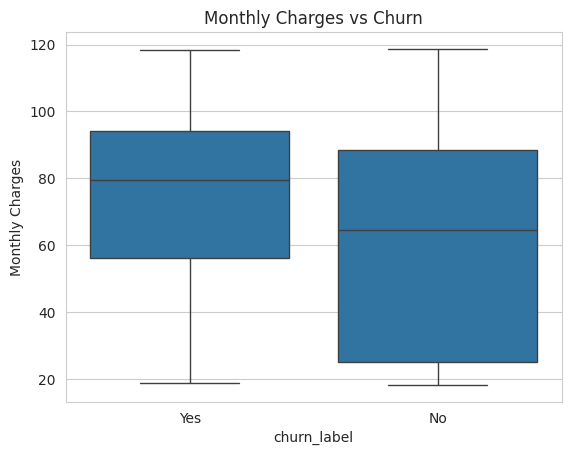

In [14]:
sns.boxplot(data=df, x="churn_label", y="Monthly Charges")
plt.title("Monthly Charges vs Churn")
plt.show()


## Monthly Charges and Churn
Churned customers generally exhibit higher monthly charges, indicating a
potential price sensitivity component to churn behavior.


In [15]:
contract_churn = (
    df.groupby("Contract")["churn_label"]
      .apply(lambda x: (x == "Yes").mean())
      .sort_values(ascending=False)
)

contract_churn


,churn_label
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


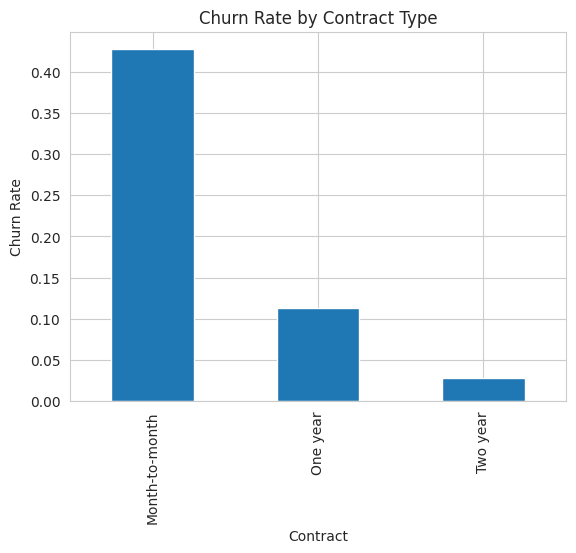

In [16]:
contract_churn.plot(kind="bar")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


## Contract Type and Churn
Month-to-month contracts show substantially higher churn rates compared to
one-year and two-year contracts, making contract type a strong churn indicator.


In [17]:
internet_churn = (
    df.groupby("Internet Service")["churn_label"]
      .apply(lambda x: (x == "Yes").mean())
      .sort_values(ascending=False)
)

internet_churn


,churn_label
Internet Service,
Fiber optic,0.418928
DSL,0.189591
No,0.074050


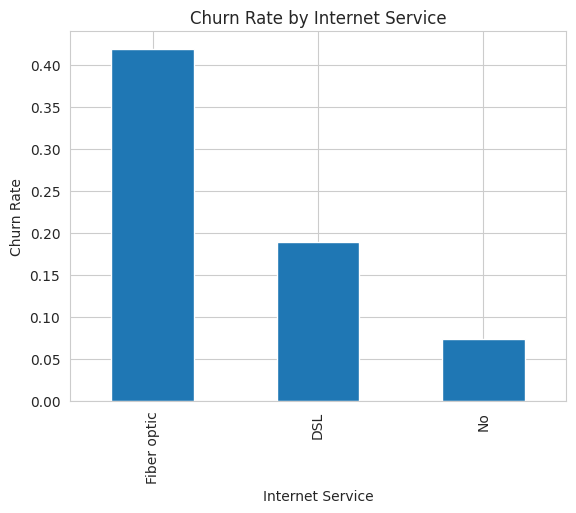

In [18]:
internet_churn.plot(kind="bar")
plt.title("Churn Rate by Internet Service")
plt.ylabel("Churn Rate")
plt.show()


## Internet Service and Churn
Fiber optic customers exhibit higher churn rates relative to DSL and non-internet
customers, suggesting potential service quality or pricing factors.


In [19]:
df.isna().sum().sort_values(ascending=False)


,0
churn_label,0
Count,0
Tenure Months,0
Monthly Charges,0
Total Charges,0
CLTV,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0


## Missing Values
Missing values are limited and primarily occur in `Total Charges`. These are
handled during model training via imputation within the preprocessing pipeline
to avoid data leakage.


In [20]:
import os
os.makedirs("reports/figures", exist_ok=True)


## EDA Summary
Key findings from exploratory analysis include:
- Churn is more prevalent among customers with shorter tenure.
- Higher monthly charges are associated with increased churn risk.
- Contract type and internet service are strong predictors of churn.

These insights directly inform feature importance expectations and threshold
selection strategies used in the modeling stage.
